<a href="https://colab.research.google.com/github/Lipun101/netflix-content-classification/blob/main/Netflix_Data_Analysis_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Data Analysis and Classification**

**NLP (Natural Language Processing) process on the Netflix dataset**

In [ ]:
# Importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.sparse import hstack
from scipy.stats import chi2_contingency

In [ ]:
# Reading the dataset

data2 = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
data2.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
data2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data2.shape

(8807, 12)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data2.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# **Data Cleaning**

In [ ]:
# Cleaning up the Rating column

default_rating = 'Not specified'
data2['rating'] = data2['rating'].fillna(default_rating)

replacements = {
    '66 min': 'Mature Audience',
    '74 min': 'Mature Audience',
    '84 min': 'Mature Audience',
    'TV-MA': 'Mature Audience',
    'TV-14': 'Teens 14+',
    'TV-PG': 'Parental Guidance',
    'TV-G': 'General Audience',
    'TV-Y': 'All Children',
    'TV-Y7': 'Older Children',
    'G': 'General Audience',
    'PG': 'Parental Guidance',
    'PG-13': 'Parents Strongly Cautioned',
    'R': 'Restricted',
    'NC-17': 'Adults Only',
    'UR': 'Unrated',
    'NR' : 'Not Rated',
    'TV-Y7-FV' : 'fantasy violence'
}
data2['rating'] = data2['rating'].replace(replacements)

In [ ]:
data2['rating'].value_counts()

rating
Mature Audience               3210
Teens 14+                     2160
Parental Guidance             1150
Restricted                     799
Parents Strongly Cautioned     490
Older Children                 334
All Children                   307
General Audience               261
Not Rated                       80
fantasy violence                 6
Not specified                    4
Adults Only                      3
Unrated                          3
Name: count, dtype: int64

In [ ]:
# Filling up the null values in the country column

default_country = 'Not Specified'
data2['country'] = data2['country'].fillna(default_country)

# **Natural Language Processing (NLP)**

**Creating and testing a model where I can simply pass a description to this model, and it will return the predicted type (either "Movie" or "TV Show").**


In [ ]:
# Inspect the relevant text columns
print(data2[['title', 'description', 'listed_in']].head())

                   title                                        description  \
0   Dick Johnson Is Dead  As her father nears the end of his life, filmm...   
1          Blood & Water  After crossing paths at a party, a Cape Town t...   
2              Ganglands  To protect his family from a powerful drug lor...   
3  Jailbirds New Orleans  Feuds, flirtations and toilet talk go down amo...   
4           Kota Factory  In a city of coaching centers known to train I...   

                                           listed_in  
0                                      Documentaries  
1    International TV Shows, TV Dramas, TV Mysteries  
2  Crime TV Shows, International TV Shows, TV Act...  
3                             Docuseries, Reality TV  
4  International TV Shows, Romantic TV Shows, TV ...  


In [ ]:
# Download NLTK data files (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Preprocess the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing to the 'description' column
data2['cleaned_description'] = data2['description'].apply(preprocess_text)

# Inspect the cleaned text
print(data2[['description', 'cleaned_description']].head())

                                         description  \
0  As her father nears the end of his life, filmm...   
1  After crossing paths at a party, a Cape Town t...   
2  To protect his family from a powerful drug lor...   
3  Feuds, flirtations and toilet talk go down amo...   
4  In a city of coaching centers known to train I...   

                                 cleaned_description  
0  father nears end life filmmaker kirsten johnso...  
1  crossing paths party cape town teen sets prove...  
2  protect family powerful drug lord skilled thie...  
3  feuds flirtations toilet talk go among incarce...  
4  city coaching centers known train india ’ fine...  


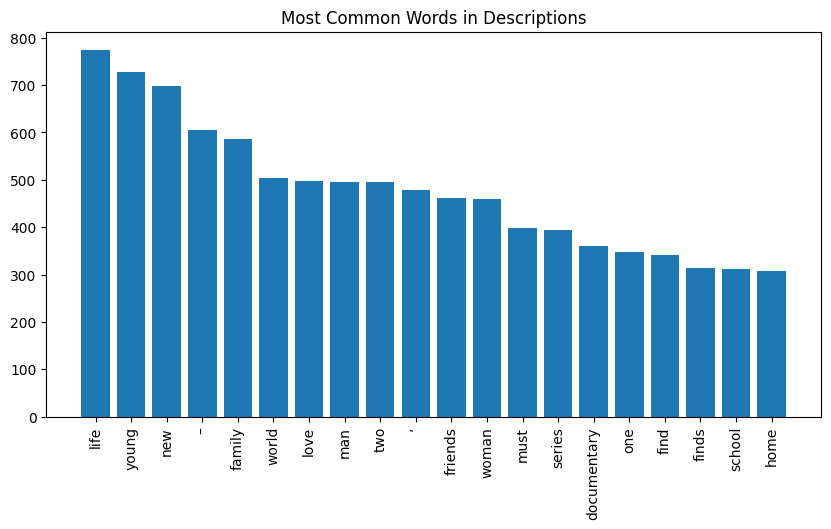

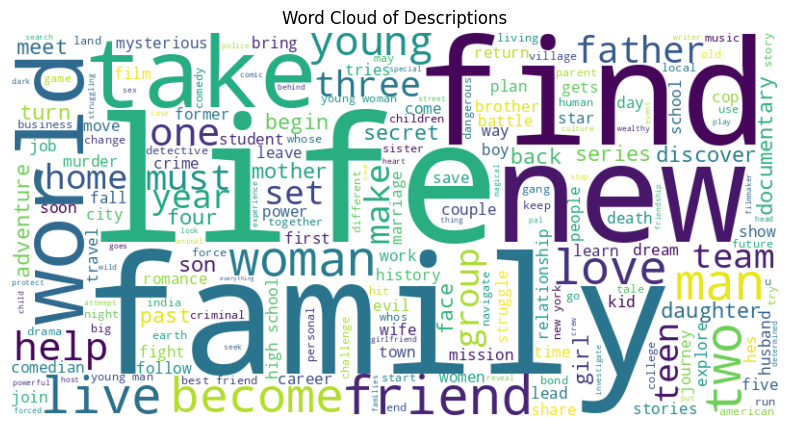

In [ ]:
# Word frequency analysis
word_counts = Counter(" ".join(data2['cleaned_description']).split())
common_words = word_counts.most_common(20)

# Plot the most common words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Most Common Words in Descriptions')
plt.xticks(rotation=90)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data2['cleaned_description']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()

In [ ]:
# Extract TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data2['cleaned_description'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Inspect the TF-IDF DataFrame
print(tfidf_df.head())

    10  100  10000  100000  10yearold   11  11yearold   12  12yearold   13  \
0  0.0  0.0    0.0     0.0        0.0  0.0        0.0  0.0        0.0  0.0   
1  0.0  0.0    0.0     0.0        0.0  0.0        0.0  0.0        0.0  0.0   
2  0.0  0.0    0.0     0.0        0.0  0.0        0.0  0.0        0.0  0.0   
3  0.0  0.0    0.0     0.0        0.0  0.0        0.0  0.0        0.0  0.0   
4  0.0  0.0    0.0     0.0        0.0  0.0        0.0  0.0        0.0  0.0   

   ...  younger  youngest  youth  youtube  zack  zany  zoe  zombie  zombies  \
0  ...      0.0       0.0    0.0      0.0   0.0   0.0  0.0     0.0      0.0   
1  ...      0.0       0.0    0.0      0.0   0.0   0.0  0.0     0.0      0.0   
2  ...      0.0       0.0    0.0      0.0   0.0   0.0  0.0     0.0      0.0   
3  ...      0.0       0.0    0.0      0.0   0.0   0.0  0.0     0.0      0.0   
4  ...      0.0       0.0    0.0      0.0   0.0   0.0  0.0     0.0      0.0   

   zone  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.

In [ ]:
# Evaluating a Logistic Regression Model
# Prepare the target variable (binarize 'listed_in' for simplicity)

data2['is_movie'] = data2['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, data2['is_movie'], test_size=0.2, random_state=42)

# Build a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.80      0.28      0.41       548
           1       0.75      0.97      0.84      1214

    accuracy                           0.75      1762
   macro avg       0.77      0.62      0.63      1762
weighted avg       0.76      0.75      0.71      1762

Accuracy: 0.753688989784336


Use TfidfVectorizer to convert the cleaned text data into numerical features.
Convert the 'type' column to a binary target variable ('is_movie').
Split the data into training and testing sets.
Build and train a logistic regression model using the TF-IDF features.
Evaluate the model's performance using classification metrics and accuracy score.

Providing a simple and understandable way to start with NLP on the Netflix dataset, focusing on building a text classification model.

The classification report and accuracy score will help you understand how well the model performs in distinguishing between movies and TV shows based on their descriptions. If the accuracy is high and the classification report shows good precision and recall, the model is performing well. If not, you may need to consider more advanced preprocessing, feature extraction techniques, or different models. Here Accuracy is I can say it's not very good but yes it's good.

In [ ]:
# Function to test the model with new data
def predict_type(description):
    # Preprocess the input description
    cleaned_description = preprocess_text(description)
    # Transform the input description using the TF-IDF vectorizer
    tfidf_description = tfidf_vectorizer.transform([cleaned_description])
    # Predict the type using the trained model
    prediction = model.predict(tfidf_description)
    # Return the prediction result
    return 'Movie' if prediction[0] == 1 else 'TV Show'

# Test the function with new data
new_description = "A thrilling adventure of a group of friends exploring a haunted house."
print(f'The predicted type for the description is: {predict_type(new_description)}')

The predicted type for the description is: TV Show


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Testing the Model:
To test the model with new descriptions, you can use the predict_type function. Simply pass a new description to this function, and it will return the predicted type (either "Movie" or "TV Show").

The predict_type function preprocesses the input description, transforms it using the TF-IDF vectorizer, and makes a prediction using the trained model.

**Model To extract the 5 movies or TV shows with the most similar plot descriptions to a given movie or TV show**

In [ ]:
# Select relevant columns and drop rows with missing values
data2 = data2[['title', 'description']].dropna()

# Preprocess the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing to the 'description' column
data2['cleaned_description'] = data2['description'].apply(preprocess_text)

# Extract TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data2['cleaned_description'])

# Function to find the most similar movies/TV shows
def find_similar(title, num_results=5):
    # Get the index of the given title
    idx = data2[data2['title'] == title].index[0]
    # Compute the cosine similarity of this movie with all others
    cosine_similarities = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    # Get the indices of the top 'num_results' most similar movies/TV shows
    similar_indices = cosine_similarities.argsort()[-(num_results+1):-1][::-1]
    # Get the titles of the most similar movies/TV shows
    similar_items = data2.iloc[similar_indices][['title', 'description']]
    return similar_items

# Test the function with a given title
title = "Catch Me If You Can"
similar_titles = find_similar(title, num_results=5)
print(f'Titles most similar to "{title}":')
print(similar_titles)

Titles most similar to "Catch Me If You Can":
                                              title  \
5552                                           Toro   
5371  Aditi Mittal: Things They Wouldn't Let Me Say   
8433         The Naked Gun 2 1/2: The Smell of Fear   
1863                                       Hunterrr   
7868                                 Righteous Kill   

                                            description  
5552  Ex-con Toro's brother and former partner in cr...  
5371  Trailblazing comic Aditi Mittal mixes topical ...  
8433  Bumbling cop Frank Drebin is out to foil the b...  
1863  A sex-obsessed young man tries to put his past...  
7868  Two detectives investigate a rash of vigilante...  


Extract features using TF-IDF:
Use TfidfVectorizer to convert the cleaned text data into numerical features.
Find similar movies or TV shows:

The find_similar function takes a title and the number of results to return.
It computes the cosine similarity of the given title's description with all other descriptions.
It identifies the indices of the top most similar descriptions and retrieves their titles and descriptions.

# **K-means Clustering Model**

In [ ]:
# One-hot encode categorical variables
categorical_cols = ['country', 'listed_in', 'type', 'rating']
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
categorical_matrix = onehot_encoder.fit_transform(data2[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


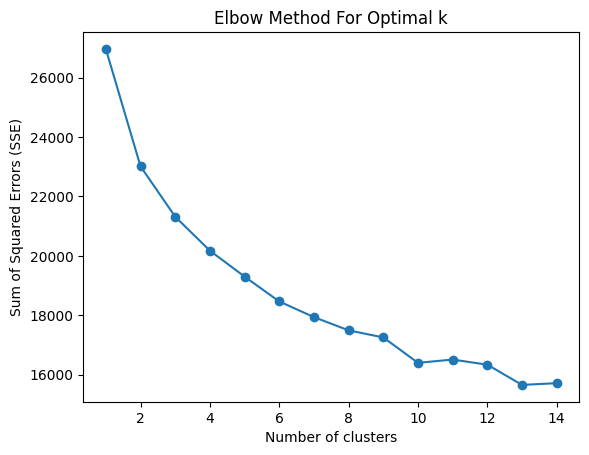

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
def plot_elbow_method(categorical_matrix):
    sse = []
    k_range = range(1, 15)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(categorical_matrix)
        sse.append(kmeans.inertia_)
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method For Optimal k')
    plt.show()

plot_elbow_method(categorical_matrix)

In [ ]:
# Choose the number of clusters based on the elbow method plot (e.g., k=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
data2['cluster'] = kmeans.fit_predict(categorical_matrix)

# Analyze the clusters
for i in range(k):
    print(f"\nCluster {i+1}")
    print(data2[data2['cluster'] == i][['title', 'country', 'listed_in', 'type', 'rating']].head(3))


Cluster 1
                                              title         country  \
8                     The Great British Baking Show  United Kingdom   
20  Monsters Inside: The 24 Faces of Billy Milligan             NaN   
21                           Resurrection: Ertugrul          Turkey   

                                            listed_in     type rating  
8                        British TV Shows, Reality TV  TV Show  TV-14  
20  Crime TV Shows, Docuseries, International TV S...  TV Show  TV-14  
21  International TV Shows, TV Action & Adventure,...  TV Show  TV-14  

Cluster 2
                               title  \
6   My Little Pony: A New Generation   
7                            Sankofa   
12                      Je Suis Karl   

                                              country  \
6                                                 NaN   
7   United States, Ghana, Burkina Faso, United Kin...   
12                            Germany, Czech Republic   

               

**Principal Component Analysis**

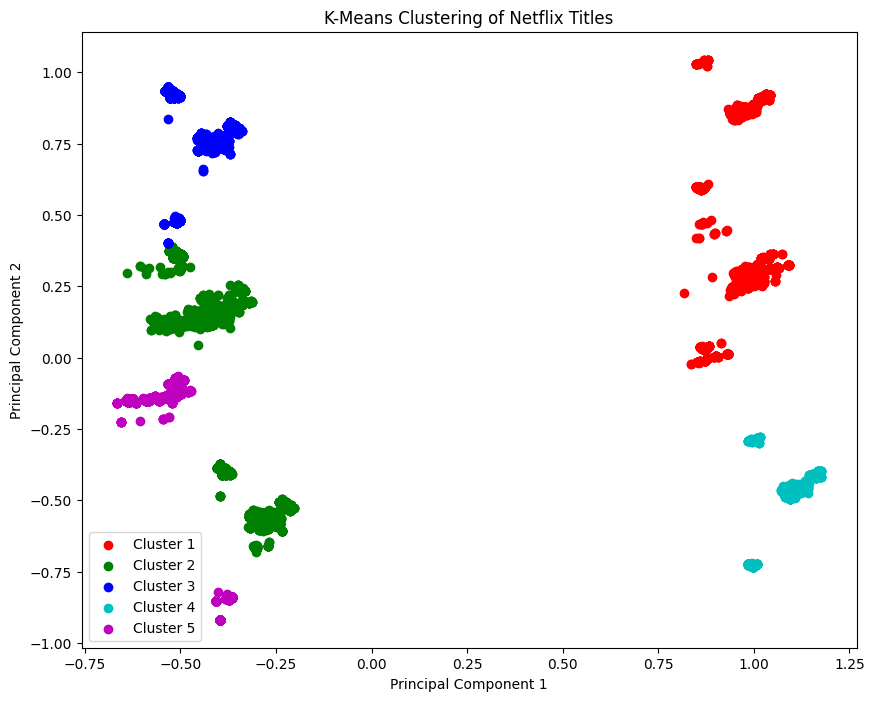

In [ ]:
# Visualize clusters using PCA (for 2D visualization)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(categorical_matrix.toarray())

colors = ['r', 'g', 'b', 'c', 'm']
x_axis = scatter_plot_points[:, 0]
y_axis = scatter_plot_points[:, 1]

fig, ax = plt.subplots(figsize=(10, 8))

for i in range(k):
    points = scatter_plot_points[data2['cluster'] == i]
    ax.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i+1}')

ax.legend()
plt.title('K-Means Clustering of Netflix Titles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Optimal Number of Clusters:
The Elbow Method is used to plot the Sum of Squared Errors (SSE) for different values of k and visually inspect the "elbow" point.
The Silhouette Score is computed for different values of k to determine the optimal number of clusters based on the highest score.
K-Means Clustering:

The K-Means algorithm is applied to the TF-IDF matrix with the chosen number of clusters.
Each data point (movie/TV show) is assigned to a cluster.
Analysis and Visualization:

The characteristics of each cluster are printed to understand the grouping.
PCA is used for 2D visualization of the clusters to see how the data points are distributed across clusters.

This approach will help us grouping the similar movies or TV shows based on their descriptions and understand the underlying patterns in the Netflix dataset.

**Creating a Function to Predict the Cluster**

In [ ]:
# Function to Predict the Cluster:
# Function to preprocess the input data without description
def preprocess_input(country, listed_in, type_, rating):
    # Create a DataFrame for the categorical data
    input_data = pd.DataFrame({

        'country': [country],
        'listed_in': [listed_in],
        'type': [type_],
        'rating': [rating]
    })

    # One-hot encode the categorical data using the trained encoder
    categorical_features = onehot_encoder.transform(input_data)

    return categorical_features

# Function to predict the cluster for a new Netflix title
def predict_cluster(country, listed_in, type_, rating):
    input_features = preprocess_input(country, listed_in, type_, rating)
    predicted_cluster = kmeans.predict(input_features)
    return predicted_cluster[0]

# Example usage
new_country = "United States"
new_listed_in = "Horror Movies, Sci-Fi & Fantasy"
new_type = "Movie"
new_rating = 'Parents Strongly Cautioned'

predicted_cluster = predict_cluster(new_country, new_listed_in, new_type, new_rating)
print(f"The predicted cluster for the new title is: {predicted_cluster}")



The predicted cluster for the new title is: 4


# **Correlation between 'country' and 'rating'**

Chi-Square statistic: 1651.7623835644674
P-value: 2.083672064637182e-274
Degrees of freedom: 108
Cramér's V: 0.18575372681494481


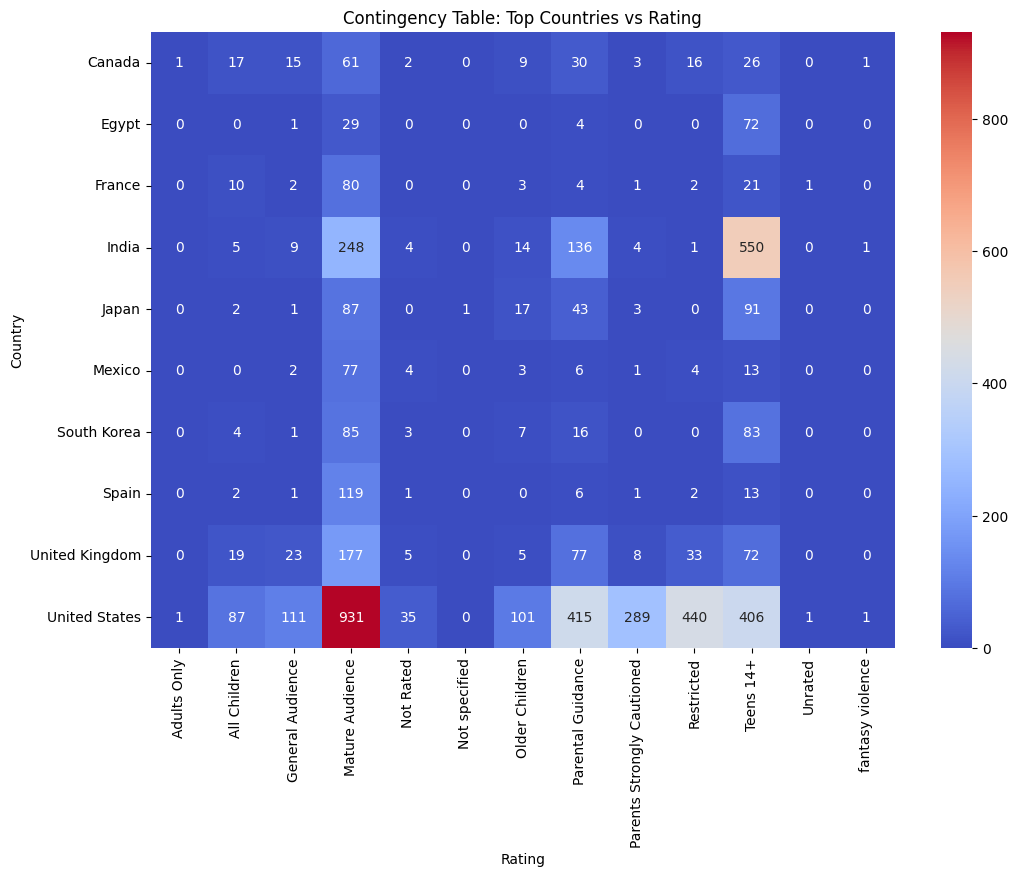

Contingency Table:
 rating          Adults Only  All Children  General Audience  Mature Audience  \
country                                                                        
Canada                    1            17                15               61   
Egypt                     0             0                 1               29   
France                    0            10                 2               80   
India                     0             5                 9              248   
Japan                     0             2                 1               87   
Mexico                    0             0                 2               77   
South Korea               0             4                 1               85   
Spain                     0             2                 1              119   
United Kingdom            0            19                23              177   
United States             1            87               111              931   

rating          Not

In [ ]:
# Select relevant columns
data2 = data2[['country', 'rating']]

# Aggregate data: Focus on the top 10 countries by number of entries
top_countries = data2['country'].value_counts().head(10).index
top_data = data2[data2['country'].isin(top_countries)]

# Create a contingency table for top countries
contingency_table = pd.crosstab(top_data['country'], top_data['rating'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Display the results
print(f'Chi-Square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Cramér\'s V: {cramers_v}')

# Visualize the contingency table for top countries
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('Contingency Table: Top Countries vs Rating')
plt.xlabel('Rating')
plt.ylabel('Country')
plt.show()

# Print the contingency table
print("Contingency Table:\n", contingency_table)



The code focuses on the top 10 countries by the number of entries to make the heatmap more readable.
"top_countries" holds the names of the top 10 countries.
"top_data" filters the original data to include only these top countries.

A contingency table is created using pd.crosstab for these top countries.
The Chi-Square test is performed, and Cramér's V is calculated.
A heatmap is generated to visualize the frequency distribution of 'country' vs 'rating' for the top countries.